<a href="https://colab.research.google.com/github/JaswanthReddy15/Jaswanth_Reddy_INBT03921_AUG_2023/blob/main/CIFAR10_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import keras
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from keras.datasets import cifar10

from keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from keras.layers import Dense,Dropout,BatchNormalization
from keras import datasets,layers,models
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

from PIL import Image

# LOADING CIFAR-10 DATASET

In [ ]:
(X_train, Y_train), (X_test, Y_test) =datasets.cifar10.load_data()

170498071/170498071 [==============================] - 15s 0us/step


In [ ]:
# training shape
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
Y_train.shape


(50000, 1)

In [ ]:
Y_test.shape

(10000, 1)

#Reshape

In [ ]:
Y_train=Y_train.reshape(-1,)
Y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
classes=["airplane", "automobile", "bird", "cat", "deer","dog", "frog", "horse", "ship", "truck"]
len(classes)

10

observeing  dataset

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

<Figure size 1000x200 with 0 Axes>

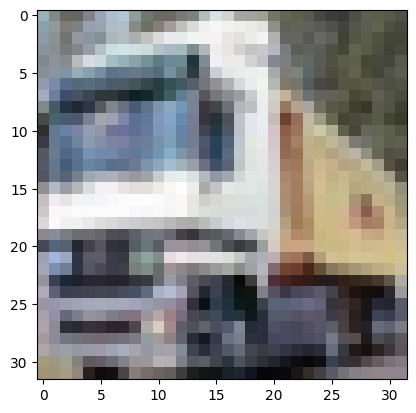

<Figure size 1000x200 with 0 Axes>

In [ ]:
plt.imshow(X_train[1])
plt.figure(figsize=(10,2))


# Spliting data

In [ ]:
X_train = X_train / 225.0
X_test = X_test / 225.0
Y_train = to_categorical(Y_train, 10)
Y_test =  to_categorical(Y_test, 10)


In [ ]:
print(Y_train.shape)
X_train_split = X_train[:50000]
Y_train_split = Y_train[:50000]

X_val= X_train[40000:]
Y_val= Y_train[40000:]
print(Y_train_split.shape)
print(Y_val.shape)

(50000, 10)
(50000, 10)
(10000, 10)


# VGG16- MODEL

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import to_categorical
base_model = VGG19(weights=None, include_top=False, input_shape=(32, 32, 3))

x = base_model.output
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=3, batch_size=32, validation_data=(X_test, Y_test))



Epoch 1/3
1563/1563 [==============================] - 84s 43ms/step - loss: 2.3029 - accuracy: 0.0978 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/3
1563/1563 [==============================] - 65s 42ms/step - loss: 2.3028 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/3
1563/1563 [==============================] - 66s 43ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3026 - val_accuracy: 0.1000


In [ ]:
#accuracy
accuracy = model.evaluate(X_train, Y_train)
print(f"Train Accuracy: {accuracy}")

1563/1563 [==============================] - 18s 11ms/step - loss: 2.3026 - accuracy: 0.1000
Train Accuracy: [2.3026394844055176, 0.10000000149011612]


Epoch 1/3
313/313 [==============================] - 29s 85ms/step - loss: 2.3027 - accuracy: 0.0972 - val_loss: 2.3027 - val_accuracy: 0.0997
Epoch 2/3
313/313 [==============================] - 25s 79ms/step - loss: 2.3026 - accuracy: 0.0982 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 3/3
313/313 [==============================] - 23s 74ms/step - loss: 2.3026 - accuracy: 0.1012 - val_loss: 2.3027 - val_accuracy: 0.0952


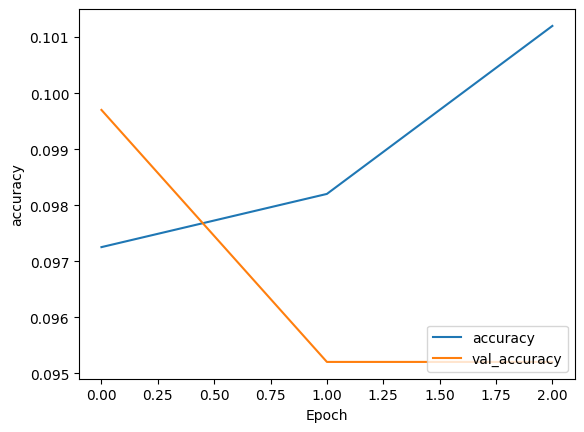

In [ ]:
history=model.fit(X_train, Y_train, batch_size=128, epochs=3, validation_split=0.2)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')

plt.legend(['accuracy','val_accuracy'],loc='lower right')
losses,acc=model.evaluate(X_test,Y_test,verbose=3)
plt.show()

# CNN MODEL

In [ ]:

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 conv2d_20 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 6, 6, 64)         

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_test, Y_test, batch_size=128, epochs=3, validation_split=0.2)


Epoch 1/3
63/63 [==============================] - 3s 23ms/step - loss: 0.5272 - accuracy: 0.8145 - val_loss: 0.9762 - val_accuracy: 0.6830
Epoch 2/3
63/63 [==============================] - 1s 20ms/step - loss: 0.4348 - accuracy: 0.8506 - val_loss: 1.0558 - val_accuracy: 0.6705
Epoch 3/3
63/63 [==============================] - 1s 21ms/step - loss: 0.3748 - accuracy: 0.8717 - val_loss: 1.0802 - val_accuracy: 0.6710


In [ ]:
history=model.fit(X_train, Y_train, batch_size=128, epochs=3, validation_split=0.2)


Epoch 1/3
313/313 [==============================] - 6s 19ms/step - loss: 0.7479 - accuracy: 0.7393 - val_loss: 0.8166 - val_accuracy: 0.7163
Epoch 2/3
313/313 [==============================] - 6s 20ms/step - loss: 0.6832 - accuracy: 0.7605 - val_loss: 0.7926 - val_accuracy: 0.7260
Epoch 3/3
313/313 [==============================] - 6s 19ms/step - loss: 0.6263 - accuracy: 0.7808 - val_loss: 0.7945 - val_accuracy: 0.7283


In [ ]:
cnn_loss, cnn_accuracy = model.evaluate(X_test, Y_test)
print(f"CNN Model - Test Loss: {cnn_loss:.4f}")
print(f"CNN Model - Test Accuracy: {cnn_accuracy*100:.2f}%")


313/313 [==============================] - 2s 5ms/step - loss: 0.5939 - accuracy: 0.7942
CNN Model - Test Loss: 0.5939
CNN Model - Test Accuracy: 79.42%


# calculating Accuracy

In [ ]:
accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy*100}")

313/313 [==============================] - 1s 4ms/step - loss: 0.5939 - accuracy: 0.7942
Test Accuracy: [0.5938818454742432, 0.7942000031471252, 0.5938818454742432, 0.7942000031471252, 0.5938818454742432, 0.7942000031471252, 0.5938818454742432, 0.7942000031471252, 0.5938818454742432, 0.7942000031471252, 0.5938818454742432, 0.7942000031471252, 0.5938818454742432, 0.7942000031471252, 0.5938818454742432, 0.7942000031471252, 0.5938818454742432, 0.7942000031471252, 0.5938818454742432, 0.7942000031471252, 0.5938818454742432, 0.7942000031471252, 0.5938818454742432, 0.7942000031471252, 0.5938818454742432, 0.7942000031471252, 0.5938818454742432, 0.7942000031471252, 0.5938818454742432, 0.7942000031471252, 0.5938818454742432, 0.7942000031471252, 0.5938818454742432, 0.7942000031471252, 0.5938818454742432, 0.7942000031471252, 0.5938818454742432, 0.7942000031471252, 0.5938818454742432, 0.7942000031471252, 0.5938818454742432, 0.7942000031471252, 0.5938818454742432, 0.7942000031471252, 0.5938818454742

In [ ]:
Y_predictions=model.predict(X_test)

313/313 [==============================] - 6s 20ms/step


In [ ]:
Y_predictions[10]

array([5.8407313e-01, 2.0364709e-05, 2.9830800e-02, 8.5717618e-02,
       1.9535878e-01, 8.8895701e-02, 8.5800464e-05, 6.3864738e-03,
       9.6229706e-03, 8.4811572e-06], dtype=float32)

# Confusion Matrix

In [ ]:
!pip install confusion_matrix
import confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
cnn_pred = model.predict(X_test)
cnn_labels = np.argmax(Y_test, axis=1)
cnn_pred = np.argmax(cnn_pred, axis=1)
cnn_confusion = confusion_matrix(cnn_labels,cnn_pred)
("CNN Model Confusion Matrix:")
(cnn_confusion)

313/313 [==============================] - 1s 3ms/step


array([[937,   3,  16,   5,   3,   2,   6,   3,   9,  16],
       [ 10, 921,   3,   5,   1,   5,   6,   2,   3,  44],
       [ 24,   0, 849,  21,  34,  31,  22,  13,   4,   2],
       [ 12,   2,  32, 776,  27, 108,  28,  10,   2,   3],
       [  6,   2,  46,  17, 873,  17,  16,  22,   1,   0],
       [  7,   1,  20,  48,  26, 871,  10,  14,   1,   2],
       [  6,   2,  26,  16,  12,  12, 922,   3,   0,   1],
       [  2,   1,   9,   9,  19,  22,   2, 934,   0,   2],
       [ 44,  13,  10,   6,   4,   4,   4,   6, 890,  19],
       [ 14,  10,   3,   6,   2,   3,   2,   9,   4, 947]])

In [ ]:
cnn_report = classification_report(cnn_labels, cnn_pred)
("CNN Model Evaluation Metrics:")
(cnn_report)

'              precision    recall  f1-score   support\n\n           0       0.88      0.94      0.91      1000\n           1       0.96      0.92      0.94      1000\n           2       0.84      0.85      0.84      1000\n           3       0.85      0.78      0.81      1000\n           4       0.87      0.87      0.87      1000\n           5       0.81      0.87      0.84      1000\n           6       0.91      0.92      0.91      1000\n           7       0.92      0.93      0.93      1000\n           8       0.97      0.89      0.93      1000\n           9       0.91      0.95      0.93      1000\n\n    accuracy                           0.89     10000\n   macro avg       0.89      0.89      0.89     10000\nweighted avg       0.89      0.89      0.89     10000\n'

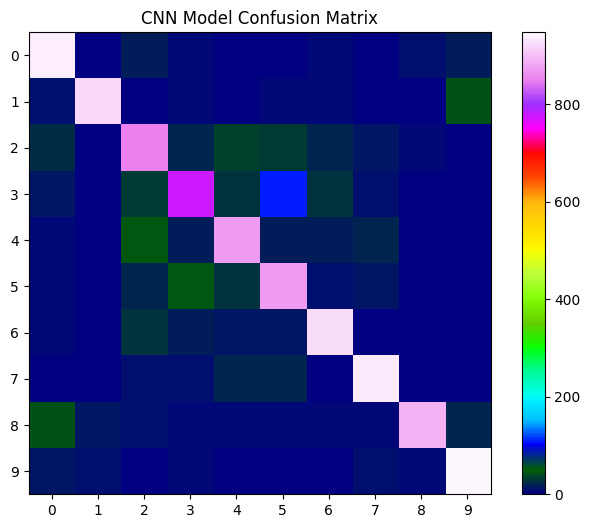

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(cnn_confusion, cmap='gist_ncar')
plt.title('CNN Model Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.show()

# TRANSFER LEARNING

In [ ]:
transfer_model = Sequential()
transfer_model.add(base_model)
transfer_model.add(Flatten())
transfer_model.add(Dense(256, activation='relu'))

transfer_model.add(Dense(10, activation='softmax'))
lr=0.005
transfer_model.compile(optimizer=Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
transfer_model.fit(X_train, Y_train, batch_size=128, epochs=3, validation_split=0.2)


Epoch 1/3
313/313 [==============================] - 27s 68ms/step - loss: 2.3031 - accuracy: 0.1006 - val_loss: 2.3027 - val_accuracy: 0.0977
Epoch 2/3
313/313 [==============================] - 20s 65ms/step - loss: 2.3031 - accuracy: 0.0973 - val_loss: 2.3027 - val_accuracy: 0.0980
Epoch 3/3
313/313 [==============================] - 20s 65ms/step - loss: 2.3030 - accuracy: 0.0990 - val_loss: 2.3035 - val_accuracy: 0.0952


In [ ]:
transfer_loss, transfer_accuracy = transfer_model.evaluate(X_test, Y_test)
print(f"Transfer Learning Model - Test Loss: {transfer_loss:.4f}")
print(f"Transfer Learning Model - Test Accuracy: {transfer_accuracy*100:.2f}%")


313/313 [==============================] - 3s 11ms/step - loss: 2.3030 - accuracy: 0.1000
Transfer Learning Model - Test Loss: 2.3030
Transfer Learning Model - Test Accuracy: 10.00%


In [ ]:
transfer_pred = transfer_model.predict(X_test)
transfer_labels = np.argmax(Y_test, axis=1)
transfer_pred = np.argmax(transfer_pred, axis=1)

313/313 [==============================] - 3s 9ms/step


In [ ]:
transfer_report = classification_report(transfer_labels, transfer_pred)
transfer_confusion = confusion_matrix(transfer_labels, transfer_pred)
print("Transfer Learning Model Evaluation Metrics:")
print(transfer_report)


Transfer Learning Model Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.10      1.00      0.18      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Transfer Learning Model Confusion Matrix:")
print(transfer_confusion)

Transfer Learning Model Confusion Matrix:
[[   0    0 1000    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]]


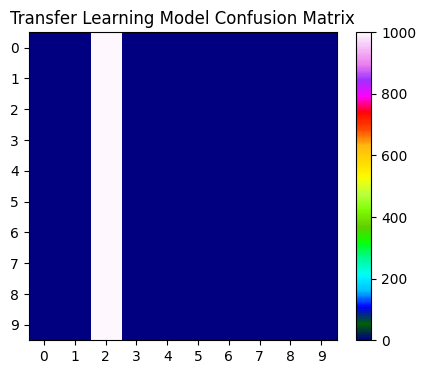

In [ ]:
plt.figure(figsize=(5, 4))
plt.imshow(transfer_confusion, cmap='gist_ncar')
plt.title('Transfer Learning Model Confusion Matrix')
plt.colorbar()

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.show()